References: 
- https://spacetelescope.github.io/mast_notebooks/notebooks/TESS/beginner_how_to_use_lc/beginner_how_to_use_lc.html

In [1]:
from astropy.io import fits
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = '/Users/eligendreaudistler/Desktop/tess2021175071901-s0040-0000000267574918-0211-a_fast/tess2021175071901-s0040-0000000267574918-0211-a_fast-lc.fits'

fits.info(filepath)
fits.getdata(filepath, ext=1).columns

Filename: /Users/eligendreaudistler/Desktop/tess2021175071901-s0040-0000000267574918-0211-a_fast/tess2021175071901-s0040-0000000267574918-0211-a_fast-lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   121861R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [3]:
with fits.open(filepath, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']          # raw flux
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']    # flux corrected for instrumental variations

In [14]:
start_time = Time(tess_bjds[0]+2457000, format='jd', scale='tdb')#.utc.iso
end_time = Time(tess_bjds[-1]+2457000, format='jd', scale='tdb')#.utc.iso

print("Observation start: ", start_time)
print("Observation end:   ", end_time)

Observation start:  2459390.6475817533
Observation end:    2459418.856123117


In [20]:
# from Swarthmore
transit_times = [2458779.3750828-2457000 + n * 1.4079405 for n in range(5000)]
print(transit_times)

[1779.3750828001648, 1780.7830233001648, 1782.1909638001648, 1783.5989043001648, 1785.0068448001648, 1786.4147853001648, 1787.8227258001648, 1789.2306663001648, 1790.6386068001648, 1792.0465473001648, 1793.4544878001648, 1794.8624283001648, 1796.2703688001648, 1797.6783093001648, 1799.0862498001648, 1800.4941903001647, 1801.9021308001647, 1803.3100713001647, 1804.7180118001647, 1806.1259523001647, 1807.5338928001647, 1808.9418333001647, 1810.3497738001647, 1811.757714300165, 1813.1656548001647, 1814.573595300165, 1815.981535800165, 1817.389476300165, 1818.797416800165, 1820.205357300165, 1821.613297800165, 1823.021238300165, 1824.429178800165, 1825.8371193001649, 1827.2450598001649, 1828.6530003001649, 1830.0609408001649, 1831.4688813001649, 1832.8768218001649, 1834.2847623001649, 1835.6927028001649, 1837.1006433001648, 1838.5085838001648, 1839.9165243001648, 1841.3244648001648, 1842.7324053001648, 1844.1403458001648, 1845.5482863001648, 1846.9562268001648, 1848.3641673001648, 1849.772

In [39]:
relative_flux = pdcsap_fluxes / np.nanmedian(pdcsap_fluxes)


In [61]:
len(tess_bjds)

121861

In [ ]:
idx = np.argsort(tess_bjds)
tes

In [74]:
tess_bjds_avgs = [np.mean(np.sort(tess_bjds)[i:i+10]) for i in np.arange(0, 12186, 10)]
pdcsap_fluxes_avgs = [np.mean(np.sort(pdcsap_fluxes)[i:i+10]) for i in np.arange(0, 12186, 10)]

KeyboardInterrupt: 

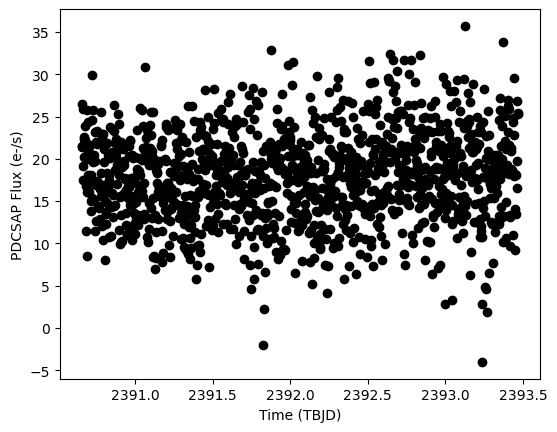

In [73]:
fig, ax = plt.subplots()

ax.plot(tess_bjds_avgs, pdcsap_fluxes_avgs, 'ko')

#for time in transit_times:
#    if time > 2390 and time < 2420:
#       ax.plot([time, time], [-60, 100])

ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

#ax.set_xlim(2398.86, 2398.88)

plt.subplots_adjust(left=0.15) # avoid cutting off y-axis label
plt.show()

In [24]:
import lightkurve as lk

# Load a TESS light curve file
lc = lk.read(filepath)

print(lc.meta)

/Users/eligendreaudistler/opt/anaconda3/lib/python3.9/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


{'INHERIT': True, 'EXTNAME': 'PRIMARY', 'EXTVER': 1, 'SIMDATA': False, 'TELESCOP': 'TESS', 'INSTRUME': 'TESS Photometer', 'OBJECT': 'TIC 267574918', 'TICID': 267574918, 'RADESYS': 'ICRS', 'RA_OBJ': 284.41393192959, 'DEC_OBJ': 53.509250467677, 'EQUINOX': 2000.0, 'EXPOSURE': 27.920039221121, 'TIMEREF': 'SOLARSYSTEM', 'TASSIGN': 'SPACECRAFT', 'TIMESYS': 'TDB', 'BJDREFI': 2457000, 'BJDREFF': 0.0, 'TIMEUNIT': 'd', 'TELAPSE': 28.202059819314, 'LIVETIME': 27.920039221121254, 'TSTART': 2390.654179154275, 'TSTOP': 2418.856238742108, 'DATE-OBS': '2021-06-25T03:40:51.895', 'DATE-END': '2021-07-23T08:31:49.843', 'DEADC': 0.99, 'TIMEPIXR': 0.5, 'TIERRELA': 1.16e-05, 'INT_TIME': 1.98, 'READTIME': 0.02, 'FRAMETIM': 2.0, 'NUM_FRM': 10, 'TIMEDEL': 0.0002314814814814815, 'BACKAPP': True, 'DEADAPP': True, 'VIGNAPP': True, 'GAINA': 5.309999942779541, 'GAINB': 5.239999771118164, 'GAINC': 5.230000019073486, 'GAIND': 5.239999771118164, 'READNOIA': 10.142099380493164, 'READNOIB': 7.912399768829346, 'READNOIC'

In [26]:
import lightkurve as lk

lc = lk.search_lightcurvefile('TIC ID', mission='TESS').download()
print(lc)

# Look for cadence information in:
print(lc.header())  # Check cadence or TIMEDEL


/var/folders/sr/g5sjm4bd55nbc1x4wnqb1dqw0000gn/T/ipykernel_25901/2876697085.py:3: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lc = lk.search_lightcurvefile('TIC ID', mission='TESS').download()
Could not resolve TIC ID to a sky position.


None


/Users/eligendreaudistler/opt/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:415: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'header'

In [38]:
print("SAP_FLUX median:", np.nanmedian(sap_fluxes))
print("PDCSAP_FLUX median:", np.nanmedian(pdcsap_fluxes))


SAP_FLUX median: 268.8134
PDCSAP_FLUX median: 17.091373
